In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(tf.__version__)

2.13.0


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
print("Total number of images:", x_train.shape[0]+x_test.shape[0])

Total number of images: 70000


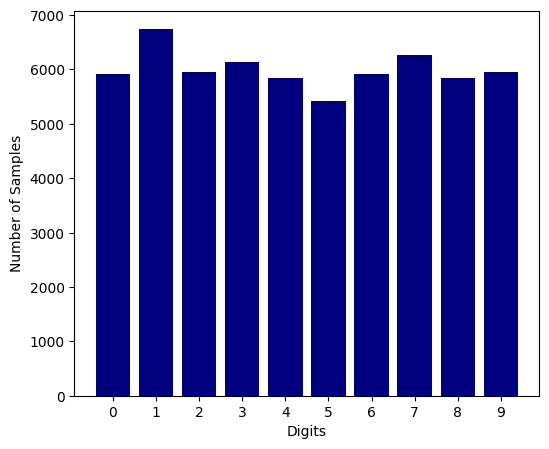

In [ ]:
unique_labels, label_counts = np.unique(y_train, return_counts=True)

# Create a bar plot
plt.figure(figsize=(6, 5))
plt.bar(unique_labels, label_counts, tick_label=unique_labels, color='navy')
plt.xlabel('Digits')
plt.ylabel('Number of Samples')
plt.show()

In [ ]:
input_shape = (28, 28, 1)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

In [ ]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


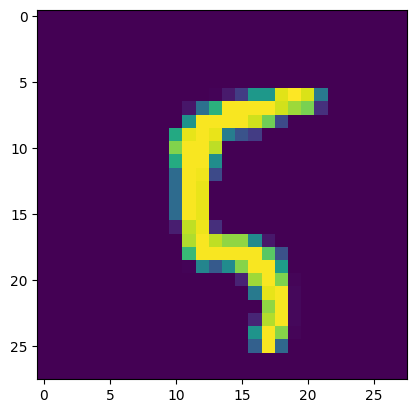

In [ ]:
plt.imshow(x_train[100][:,:,0])
print(y_train[100])

In [ ]:
batch_size = 64
num_classes = 10
epochs = 5

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.995):
            print("\nReached 99.5% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/5
844/844 [==============================] - 94s 110ms/step - loss: 0.2165 - acc: 0.9334 - val_loss: 0.0425 - val_acc: 0.9863
Epoch 2/5
844/844 [==============================] - 96s 114ms/step - loss: 0.0734 - acc: 0.9790 - val_loss: 0.0340 - val_acc: 0.9908
Epoch 3/5
844/844 [==============================] - 95s 113ms/step - loss: 0.0570 - acc: 0.9835 - val_loss: 0.0399 - val_acc: 0.9908
Epoch 4/5
844/844 [==============================] - 93s 110ms/step - loss: 0.0484 - acc: 0.9863 - val_loss: 0.0354 - val_acc: 0.9915
Epoch 5/5
844/844 [==============================] - 94s 112ms/step - loss: 0.0463 - acc: 0.9872 - val_loss: 0.0377 - val_acc: 0.9902


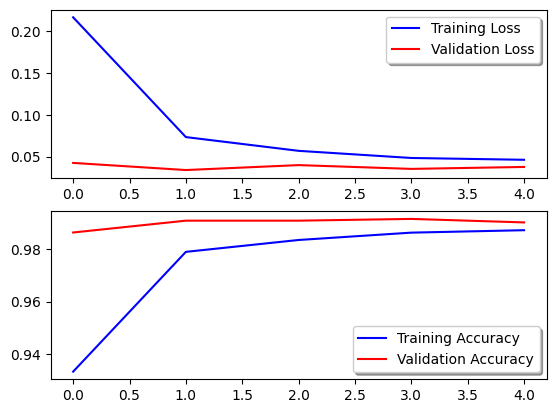

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.0241 - acc: 0.9925


In [ ]:
# Predict the values from the testing dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

313/313 [==============================] - 3s 10ms/step


<AxesSubplot:>

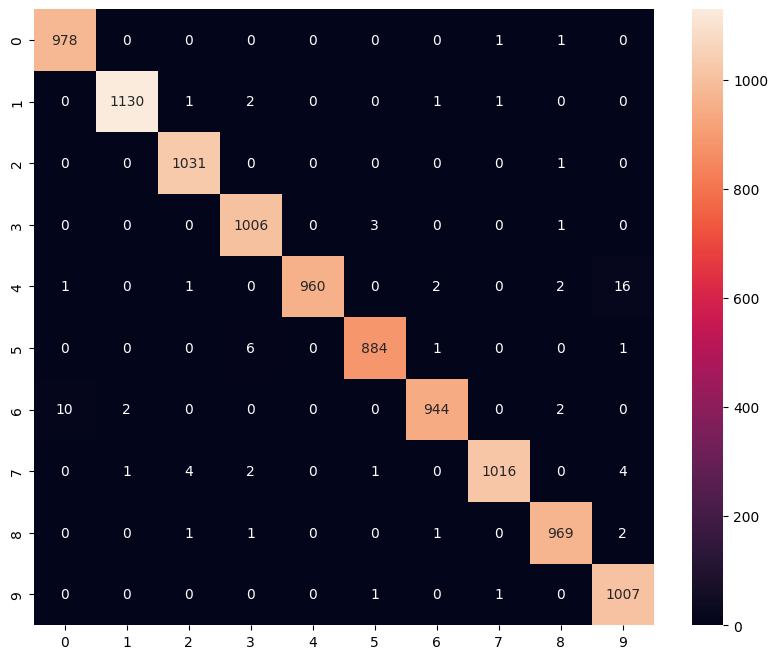

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')